In [1]:
#importing necessary libs
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import pandas as pd
import seaborn as sns
import community
import csv

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#This method records each line as a list of two elements. character and dialogue 
file = open('/kaggle/input/harry-potter-dataset/Harry Potter 1.csv','r')
HP = csv.reader(file, delimiter=';')
#for line in HP:
#   print(line[1])



In [4]:
characters = ['Harry','Snape','Dumbledore','Voldemort', 'Hermione', 'Ron', 'Draco','McGonagall', 'Hagrid','Petunia', 'Neville', 'Dudley', 'Vernon', 'Quirrell']
#Charactrs must be changed
#Character names must be replaced with  a common type to avoid aliases 


In [5]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Harry,Snape,Dumbledore,Voldemort,Hermione,Ron,Draco,McGonagall,Hagrid,Petunia,Neville,Dudley,Vernon,Quirrell
Harry,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Snape,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dumbledore,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Voldemort,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hermione,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
for lines in HP:
    for char1 in characters:
        for char2 in characters:
            #print(char1,char2)
            if (char1 != char2) and char1 in lines[0] and char2 in lines[1]:
                
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df.head()

,Harry,Snape,Dumbledore,Voldemort,Hermione,Ron,Draco,McGonagall,Hagrid,Petunia,Neville,Dudley,Vernon,Quirrell
Harry,0,10,12,10,19,28,1,3,51,1,1,3,2,2
Snape,10,0,0,0,2,2,0,0,4,0,0,0,0,4
Dumbledore,12,0,0,0,5,4,0,4,13,0,1,0,0,2
Voldemort,10,0,0,0,1,0,0,0,2,0,0,0,0,0
Hermione,19,2,5,1,0,9,0,2,1,0,2,0,0,0


In [7]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [8]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 14
Nodes: ['Harry', 'Snape', 'Dumbledore', 'Voldemort', 'Hermione', 'Ron', 'Draco', 'McGonagall', 'Hagrid', 'Petunia', 'Neville', 'Dudley', 'Vernon', 'Quirrell']

Number of edges in the graph: 40
Edges: [('Harry', 'Snape', {'weight': 10}), ('Harry', 'Dumbledore', {'weight': 12}), ('Harry', 'Voldemort', {'weight': 10}), ('Harry', 'Hermione', {'weight': 19}), ('Harry', 'Ron', {'weight': 28}), ('Harry', 'Draco', {'weight': 1}), ('Harry', 'McGonagall', {'weight': 3}), ('Harry', 'Hagrid', {'weight': 51}), ('Harry', 'Petunia', {'weight': 1}), ('Harry', 'Neville', {'weight': 1}), ('Harry', 'Dudley', {'weight': 3}), ('Harry', 'Vernon', {'weight': 2}), ('Harry', 'Quirrell', {'weight': 2}), ('Snape', 'Hermione', {'weight': 2}), ('Snape', 'Ron', {'weight': 2}), ('Snape', 'Hagrid', {'weight': 4}), ('Snape', 'Quirrell', {'weight': 4}), ('Dumbledore', 'Hermione', {'weight': 5}), ('Dumbledore', 'Ron', {'weight': 4}), ('Dumbledore', 'McGonagall', {'weight': 4}), ('Dumbled

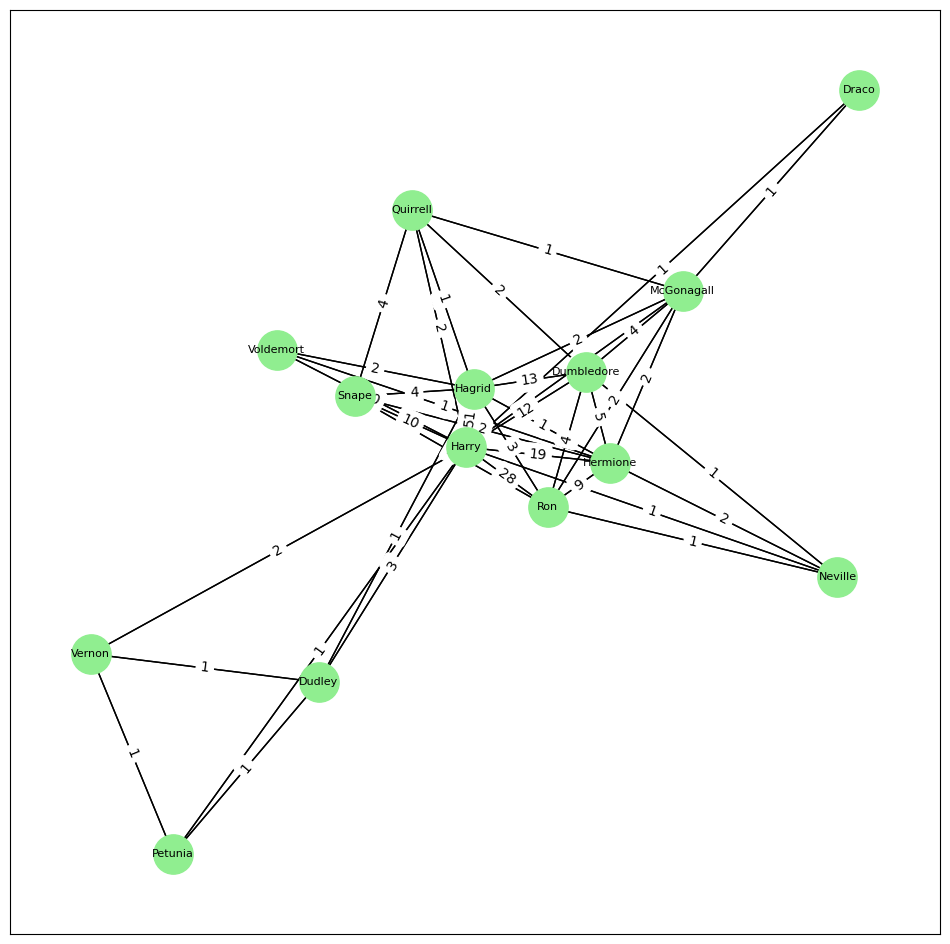

In [9]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()